**Numpy**: 数组和矢量计算

- ndarray：具有矢量算术运算和复杂广播能力的快速且节省空间的多维数组。
- 用于对整组数据进行快速运算的标准数学函数（无需编写循环）。
- 用于读写磁盘数据的工具以及用于操作内存映射文件的工具。
- 线性代数、随机数生成以及傅里叶变换功能。

对于大部分数据分析应用而言，我最关注的功能主要集中在：

- 用于数据整理和清理、子集构造和过滤、转换等快速的矢量化数组运算。
- 常用的数组算法，如排序、唯一化、集合运算等。
- 高效的描述统计和数据聚合/摘要运算。
- 用于异构数据集的合并/连接运算的数据对齐和关系型数据运算。
- 将条件逻辑表述为数组表达式（而不是带有if-elif-else分支的循环）。
- 数据的分组运算（聚合、转换、函数应用等）。

In [8]:
import numpy as np
my_arr = np.arange(1000000)
my_list = list(range(1000000))

#%time for _ in range(10):my_arr2 = [x*2 for x in my_arr] # 14.2s耗费时间更长

%time for _ in range(10): my_arr2 = my_arr * 2

Wall time: 127 ms


In [5]:
%time for _ in range(10): my_list2 = [x*2 for x in my_list]

Wall time: 4.01 s


**Numpy的ndarray: 一种多维数组对象**

In [9]:
import numpy as np

# Generate some random data
data = np.random.randn(2,3)
data

array([[0.59072885, 0.15860274, 1.62542283],
       [0.61781941, 0.32935597, 0.72714541]])

In [10]:
# 数学运算
data * 10

array([[ 5.90728846,  1.58602744, 16.25422828],
       [ 6.17819415,  3.2935597 ,  7.27145408]])

In [11]:
print(data+data)

[[1.18145769 0.31720549 3.25084566]
 [1.23563883 0.65871194 1.45429082]]


ndarray 是一个通用的同构数据多维容器。即其所有元素必须是相同的。每个数组都有一个shape（一个表示各维度大小的元组）和一个dtype（一个用于说明数组数据类型的对象）

In [14]:
data.shape

(2, 3)

In [16]:
data.dtype

dtype('float64')

**创建ndarray**

- 创建数组最简单的办法就是使用array函数。它接受一切序列型的对象（包括其他数组），然后产生一个新的含有传入数据的NumPy数组。
- zeros和ones分别可以创建指定长度或形状的全0或全1数组。
- empty可以创建一个没有任何具体值的数组。

In [17]:
data1 = [6,7.5,8,0,1]
arr1 = np.array(data1)
arr1

array([6. , 7.5, 8. , 0. , 1. ])

In [18]:
# 嵌套序列将会被转换为一个多维数组
data2 = [[1,2,3,4],[5,6,7,8]]
arr2 = np.array(data2)
arr2

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

In [19]:
arr2.ndim

2

In [20]:
arr2.shape

(2, 4)

In [21]:
arr1.dtype

dtype('float64')

In [22]:
arr2.dtype

dtype('int32')

In [24]:
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [25]:
np.zeros((3,6))

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [26]:
np.empty((2,3,2)) # np.empty返回的都是一些未初始化的垃圾值。

array([[[1.09027828e-311, 3.16202013e-322],
        [0.00000000e+000, 0.00000000e+000],
        [0.00000000e+000, 4.31569166e-061]],

       [[4.31494091e-061, 1.12186604e-047],
        [1.48475289e-076, 5.26604962e-037],
        [1.04102886e-042, 6.10580031e+170]]])

In [27]:
# arange是python内置函数range的数组版
np.arange(15)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [29]:
# ndarray的数据类型
arr1 = np.array([1,2,3], dtype=np.float64)
arr2 = np.array([1,2,3], dtype=np.int32)
arr1.dtype

dtype('float64')

In [30]:
arr2.dtype

dtype('int32')

In [31]:
# 可通过ndarray的astype方法明确地将一个数组从一个dtype转换成另一个dtype。
arr = np.array([1,2,3,4,5])
arr.dtype

dtype('int32')

In [32]:
float_arr = arr.astype(np.float64)
float_arr.dtype

dtype('float64')

In [33]:
# 若将浮点数转换为整数，则小数部分将会被截取删除
arr = np.array([3.7, -1.2, -2.6, 0.5, 12.9, 10.1])
arr

array([ 3.7, -1.2, -2.6,  0.5, 12.9, 10.1])

In [34]:
arr.astype(np.int32)

array([ 3, -1, -2,  0, 12, 10])

In [35]:
# 如果某字符串数组表示的全是数字，也可用astype将其转换为数值形式。
numeric_strings = np.array(['1.25', '-9.6', '42'], dtype=np.string_)
numeric_strings.astype(float)

array([ 1.25, -9.6 , 42.  ])

In [36]:
int_array = np.arange(10)
calibers = np.array([.22, .270, .357, .380, .44, .50], dtype=np.float64)
int_array.astype(calibers.dtype)

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [37]:
empty_unit32 = np.empty(8, dtype='u4')
empty_unit32

array([         0, 1075314688,          0, 1075707904,          0,
       1075838976,          0, 1072693248], dtype=uint32)

**numpy数组的运算**

- 数组很重要，因为它使你不用编写循环即可对数据执行批量运算。
- NumPy用户称其为矢量化（vectorization）。
- 大小相等的数组之间的任何算术运算都会将运算应用到元素级。
- 不同大小的数组之间的运算叫做广播（broadcasting）

In [38]:
arr = np.array([[1., 2., 3.], [4., 5., 6.]])
arr

array([[1., 2., 3.],
       [4., 5., 6.]])

In [39]:
arr * arr

array([[ 1.,  4.,  9.],
       [16., 25., 36.]])

In [40]:
arr - arr

array([[0., 0., 0.],
       [0., 0., 0.]])

In [41]:
# 数组与标量的算术运算会将标量值传播到各个元素

1 / arr

array([[1.        , 0.5       , 0.33333333],
       [0.25      , 0.2       , 0.16666667]])

In [42]:
arr * 0.5

array([[0.5, 1. , 1.5],
       [2. , 2.5, 3. ]])

In [44]:
# 大小相同的数组之间的比较会生成布尔值数组
arr2 =  np.array([[0., 4., 1.], [7., 2., 12.]])
arr2

array([[ 0.,  4.,  1.],
       [ 7.,  2., 12.]])

In [45]:
arr2 > arr

array([[False,  True, False],
       [ True, False,  True]])

**基本的索引和切片**

In [46]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [47]:
arr[5]

5

In [48]:
arr[5:8]

array([5, 6, 7])

- 将一个标量值赋值给一个切片时，该值会自动传播，即广播到整个选区。
- 跟列表最重要的区别在于，数组切片是原始数组的视图。这意味着数据不会被复制，视图上的任何修改都会直接反映到源数组上。

In [58]:
arr[5:8] = 12
arr

array([ 0,  1,  2,  3,  4, 12, 12, 12,  8,  9])

In [61]:
arr_slice = arr[5:8]
arr_slice

array([12, 12, 12])

In [62]:
# 修改arr_slice中的值,变动也会体现在原始数组arr中
arr_slice[1] = 12345
arr

array([    0,     1,     2,     3,     4,    12, 12345,    12,     8,
           9])

In [63]:
# 切片[:]会给数组中的所有值赋值
arr_slice[:] = 64
arr

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

注：如果你想要得到的是ndarray切片的一份副本而非视图，就需要明确地进行复制操作，例如arr[5:8].copy()。

In [64]:
# 高维度数组
arr2d = np.array([[1,2,3],[4,5,6],[7,8,9]])
arr2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [65]:
# 可对各个元素进行递归访问。可传入一个逗号隔开的索引列表来选取单个元素。
arr2d[0][2]

3

In [66]:
arr2d[0,2]

3

In [72]:
arr3d = np.array([[[1,2,3],[4,5,6]],[[7,8,9],[10,11,12]]])
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [73]:
arr3d[0]

array([[1, 2, 3],
       [4, 5, 6]])

In [74]:
# 标量值和数组都可以被赋值给arr3d[0]

old_values = arr3d[0].copy()
arr3d[0] = 42
arr3d

array([[[42, 42, 42],
        [42, 42, 42]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [75]:
arr3d[0] = old_values
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [76]:
arr3d[1,0]

array([7, 8, 9])

In [78]:
x = arr3d[1]
x

array([[ 7,  8,  9],
       [10, 11, 12]])

In [79]:
x[0]

array([7, 8, 9])

**切片索引**

In [80]:
arr 

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

In [82]:
arr[1:6]

array([ 1,  2,  3,  4, 64])

In [83]:
arr2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [84]:
arr2d[:2]

array([[1, 2, 3],
       [4, 5, 6]])

In [85]:
# 可一次传入多个切片
arr2d[:2,1:]

array([[2, 3],
       [5, 6]])

In [86]:
arr2d[1,:2]

array([4, 5])

In [88]:
arr2d[:2,2]

array([3, 6])

In [89]:
# “只有冒号”表示选取整个轴
arr2d[:, :1]

array([[1],
       [4],
       [7]])

In [91]:
arr2d[:2,1:] = 0
arr2d

array([[1, 0, 0],
       [4, 0, 0],
       [7, 8, 9]])

**布尔型索引**

In [92]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
data = np.random.randn(7,4)
names

array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'], dtype='<U4')

In [93]:
data

array([[-0.82562628, -0.41241353,  0.3118284 ,  2.1656745 ],
       [-1.66925752,  1.37340388,  1.72509933,  0.37314947],
       [-1.03417596,  0.87078588,  1.56156465,  0.83601865],
       [ 0.4171809 ,  0.31328393, -0.65961571,  0.24027471],
       [-1.21309483,  0.27290841,  2.56791812, -0.78030942],
       [-1.26314223,  1.26564987, -0.46903693,  0.0843937 ],
       [-0.9543368 ,  1.60688119,  0.36828447, -1.61704963]])

In [94]:
names == 'Bob'

array([ True, False, False,  True, False, False, False])

In [95]:
# 布尔型数组可用于数组索引
data[names == 'Bob']

array([[-0.82562628, -0.41241353,  0.3118284 ,  2.1656745 ],
       [ 0.4171809 ,  0.31328393, -0.65961571,  0.24027471]])

In [96]:
# 布尔型数组的长度必须跟被索引的轴长度一致。
data[names == 'Bob', 2:]

array([[ 0.3118284 ,  2.1656745 ],
       [-0.65961571,  0.24027471]])

In [97]:
data[names == 'Bob', 3]

array([2.1656745 , 0.24027471])

In [98]:
names != 'Bob'

array([False,  True,  True, False,  True,  True,  True])

In [101]:
# 通过~对条件进行否定
data[~(names == 'Bob')] 

array([[-1.66925752,  1.37340388,  1.72509933,  0.37314947],
       [-1.03417596,  0.87078588,  1.56156465,  0.83601865],
       [-1.21309483,  0.27290841,  2.56791812, -0.78030942],
       [-1.26314223,  1.26564987, -0.46903693,  0.0843937 ],
       [-0.9543368 ,  1.60688119,  0.36828447, -1.61704963]])

In [102]:
# ~操作符用来反转条件很好用
cond = names == 'Bob'
data[~cond]

array([[-1.66925752,  1.37340388,  1.72509933,  0.37314947],
       [-1.03417596,  0.87078588,  1.56156465,  0.83601865],
       [-1.21309483,  0.27290841,  2.56791812, -0.78030942],
       [-1.26314223,  1.26564987, -0.46903693,  0.0843937 ],
       [-0.9543368 ,  1.60688119,  0.36828447, -1.61704963]])

In [103]:
# 组合应用多个布尔条件，使用&(和)、|(或)之类的布尔算术运算符即可。
mask = (names == 'Bob') | (names == 'Will')
mask

array([ True, False,  True,  True,  True, False, False])

In [104]:
data[mask]

array([[-0.82562628, -0.41241353,  0.3118284 ,  2.1656745 ],
       [-1.03417596,  0.87078588,  1.56156465,  0.83601865],
       [ 0.4171809 ,  0.31328393, -0.65961571,  0.24027471],
       [-1.21309483,  0.27290841,  2.56791812, -0.78030942]])

通过布尔型索引选取数组中的数据，将重视创建数据的副本，即使返回一模一样的数组也是如此。

In [106]:
# 将data中的所有负值都设置为0
data[data<0] = 0
data

array([[0.        , 0.        , 0.3118284 , 2.1656745 ],
       [0.        , 1.37340388, 1.72509933, 0.37314947],
       [0.        , 0.87078588, 1.56156465, 0.83601865],
       [0.4171809 , 0.31328393, 0.        , 0.24027471],
       [0.        , 0.27290841, 2.56791812, 0.        ],
       [0.        , 1.26564987, 0.        , 0.0843937 ],
       [0.        , 1.60688119, 0.36828447, 0.        ]])

In [107]:
# 通过一维布尔数组设置整行或列的值
data[names != 'Joe'] = 7
data

array([[7.        , 7.        , 7.        , 7.        ],
       [0.        , 1.37340388, 1.72509933, 0.37314947],
       [7.        , 7.        , 7.        , 7.        ],
       [7.        , 7.        , 7.        , 7.        ],
       [7.        , 7.        , 7.        , 7.        ],
       [0.        , 1.26564987, 0.        , 0.0843937 ],
       [0.        , 1.60688119, 0.36828447, 0.        ]])

**花式索引（Fancy indexing）**

- 利用整数数组进行索引。
- 无论数组是多少维的，花式索引总是一维的。
- 花式索引跟切片不一样，它总是将数据复制到新数组中。

In [108]:
arr =  np.empty((8,4))
for i in range(8):
    arr[i] = i
arr

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.],
       [5., 5., 5., 5.],
       [6., 6., 6., 6.],
       [7., 7., 7., 7.]])

为了以特定顺序选取行子集，需传入一个用于指定顺序的整数列表或ndarray即可。

In [109]:
arr[[4,3,0,6]]

array([[4., 4., 4., 4.],
       [3., 3., 3., 3.],
       [0., 0., 0., 0.],
       [6., 6., 6., 6.]])

In [110]:
# 使用负数索引将会从末尾开始选取行
arr[[-3, -5, -7]]

array([[5., 5., 5., 5.],
       [3., 3., 3., 3.],
       [1., 1., 1., 1.]])

一个传入多个索引数组。其返回的是一个一维数组，其中的元素对应各个索引元组。

In [111]:
arr = np.arange(32).reshape((8,4))
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

In [112]:
arr[[1,5,7,2],[0,3,1,2]] # 选出的元素是(1,0)(5,3)(7,1)和(2,2)

array([ 4, 23, 29, 10])

In [113]:
arr[[1,5,7,2]][[0,3,1,2]] # 选取矩阵的行列子集为矩形区域的形式

array([[ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [20, 21, 22, 23],
       [28, 29, 30, 31]])

**数组转置和轴对换**

转置是重塑的一种特殊形式，其返回的是源数据的视图（不会进行任何复制操作）。数组不仅有transpose方法，还有一个特殊的T属性。

In [114]:
arr = np.arange(15).reshape((3,5))
arr

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [116]:
arr.T # 数组转置

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

In [117]:
# 在进行矩阵计算时，经常需要用到该操作，比如利用np.dot计算矩阵内积
arr = np.random.randn(6,3)
arr

array([[-0.80820765, -0.14531355,  0.73435454],
       [ 0.57918119, -0.51807068, -1.13543632],
       [-0.98791523, -0.54890484, -1.00288799],
       [ 0.27550648, -1.91735688, -1.16017281],
       [ 0.48170236,  0.95032783, -1.28315854],
       [ 0.15886009, -0.69226638, -0.29327557]])

In [118]:
np.dot(arr.T, arr)

array([[ 2.29780448,  0.17921559, -1.24469141],
       [ 0.17921559,  5.64942292,  2.24008353],
       [-1.24469141,  2.24008353,  5.91278389]])

In [119]:
# 对于高维数组，transpose需要得到一个由轴编号组成的元组才能对这些轴进行转置。
arr = np.arange(16).reshape((2,2,4))
arr

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

In [120]:
arr.transpose((1,0,2)) # 第一个轴被换成了第二个，第二个轴被换成了第一个，最后一个轴不变。

array([[[ 0,  1,  2,  3],
        [ 8,  9, 10, 11]],

       [[ 4,  5,  6,  7],
        [12, 13, 14, 15]]])

In [121]:
# ndarray的swapaxes方法，需要接受一对轴编号。
arr

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

In [123]:
arr.swapaxes(1,2) # swapaxes 返回源数据的视图（不会进行任何复制操作）

array([[[ 0,  4],
        [ 1,  5],
        [ 2,  6],
        [ 3,  7]],

       [[ 8, 12],
        [ 9, 13],
        [10, 14],
        [11, 15]]])

**通用函数：快速的元素级数组函数**

通用函数（即ufunc）是一种对ndarray中的数据执行元素级运算的函数。你可以将其看做简单函数（接受一个或多个标量值，并产生一个或多个标量值）的矢量化包装器。

许多ufunc都是简单的元素级变体，如sqrt和exp。

In [124]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [125]:
np.sqrt(arr)

array([0.        , 1.        , 1.41421356, 1.73205081, 2.        ,
       2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ])

In [126]:
np.exp(arr)

array([1.00000000e+00, 2.71828183e+00, 7.38905610e+00, 2.00855369e+01,
       5.45981500e+01, 1.48413159e+02, 4.03428793e+02, 1.09663316e+03,
       2.98095799e+03, 8.10308393e+03])

In [127]:
x = np.random.randn(8)
y = np.random.randn(8)
x

array([ 0.19883507, -0.58467238,  0.64171382,  0.44290217,  0.10101498,
        0.57574396,  0.2367502 , -1.60909549])

In [128]:
y

array([-1.11699036,  0.6277386 , -0.10985946, -1.71946718,  0.72037981,
       -0.35369017, -0.11603224,  1.82978982])

In [131]:
# numpy.maximum计算x和y中元素级别最大的元素。
np.maximum(x,y) # maximum接受2个数组，并返回一个结果数组。

array([0.19883507, 0.6277386 , 0.64171382, 0.44290217, 0.72037981,
       0.57574396, 0.2367502 , 1.82978982])

有些ufunc的确可以返回多个数组。modf就是一个例子，它是Python内置函数divmod的矢量化版本，它会返回浮点数数组的小数和整数部分

In [132]:
arr = np.random.randn(7)*5
arr

array([ 2.02404372, -8.41091311, -4.29147239,  2.93756609,  3.81632788,
        6.29384124, -4.89185554])

In [133]:
remainder,whole_part = np.modf(arr)
remainder

array([ 0.02404372, -0.41091311, -0.29147239,  0.93756609,  0.81632788,
        0.29384124, -0.89185554])

In [134]:
whole_part

array([ 2., -8., -4.,  2.,  3.,  6., -4.])

In [136]:
#Ufuncs可以接受一个out可选参数，能在数组原地进行操作
arr

array([ 2.02404372, -8.41091311, -4.29147239,  2.93756609,  3.81632788,
        6.29384124, -4.89185554])

In [137]:
np.sqrt(arr)

E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


array([1.4226889 ,        nan,        nan, 1.71393293, 1.95354239,
       2.50875293,        nan])

In [138]:
np.sqrt(arr, arr)

E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


array([1.4226889 ,        nan,        nan, 1.71393293, 1.95354239,
       2.50875293,        nan])

In [139]:
arr

array([1.4226889 ,        nan,        nan, 1.71393293, 1.95354239,
       2.50875293,        nan])

**利用数组进行数据处理**

- 用数组表达式代替循环的做法，通常被称为矢量化。
- 一般来说，矢量化数组运算要比等价的纯pytho方式快上一两个数量级（甚至更多），尤其是各种数值计算。

In [140]:
# np.meshgrid函数接受两个一维数组，并产生两个二维矩阵（对应于两个数组中）
# 计算函数 sqrt(x^2+y^2)
points = np.arange(-5, 5, 0.01) # 1000 equallly spaced points
xs, ys = np.meshgrid(points, points)
ys

array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
       [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
       [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
       ...,
       [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
       [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
       [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]])

In [141]:
xs

array([[-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       ...,
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99]])

array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
       [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
       [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
       ...,
       [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
       [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
       [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]])

In [143]:
z = np.sqrt(xs**2 + ys**2)
z

array([[7.07106781, 7.06400028, 7.05693985, ..., 7.04988652, 7.05693985,
        7.06400028],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       ...,
       [7.04988652, 7.04279774, 7.03571603, ..., 7.0286414 , 7.03571603,
        7.04279774],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568]])

Text(0.5, 1.0, 'Image plot of $\\sqrt{x^2 + y^2}$ for a gird of values')

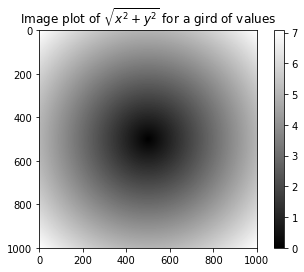

In [147]:
# 用matplotlib 创建该二维数组的可视化
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(z,cmap=plt.cm.gray);plt.colorbar()
plt.title("Image plot of $\sqrt{x^2 + y^2}$ for a gird of values")

**将条件逻辑表达为数组计算**

- numpy.where函数是三元表达式 x if condition else y 的矢量化版本。where通常用于根据另一个数组而产生一个新的数组。
- 列表推导式存在的问题：1.对大数组的处理速度不是很快；2.无法用于多维数组。

In [149]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])

# 根据cond中的值选取xarr和yarr的值
result = [(x if c else y)
         for x,y,c in zip(xarr, yarr, cond)]
result

[1.1, 2.2, 1.3, 1.4, 2.5]

In [150]:
# 使用np.where会相对简洁
result = np.where(cond, xarr, yarr)
result

array([1.1, 2.2, 1.3, 1.4, 2.5])

In [151]:
# 将由随机数据组成的矩阵中的所有正值替换为2，负值替换为-2。
arr = np.random.randn(4,4)
arr

array([[-0.52239845, -0.04180984,  0.72126214,  0.85627398],
       [-1.36353817,  1.00666047, -0.98989179,  0.3266277 ],
       [ 0.9234131 ,  1.28047952, -0.93398501,  1.78155358],
       [-0.60610036,  0.02475451,  1.1636476 , -1.379719  ]])

In [152]:
arr > 0

array([[False, False,  True,  True],
       [False,  True, False,  True],
       [ True,  True, False,  True],
       [False,  True,  True, False]])

In [153]:
np.where(arr>0,2,-2)

array([[-2, -2,  2,  2],
       [-2,  2, -2,  2],
       [ 2,  2, -2,  2],
       [-2,  2,  2, -2]])

In [154]:
# 使用np.where，可以将标量和数组结合起来。例如，用2替换arr中所有的正值。
np.where(arr>0,2,arr) # set only positive values to 2

array([[-0.52239845, -0.04180984,  2.        ,  2.        ],
       [-1.36353817,  2.        , -0.98989179,  2.        ],
       [ 2.        ,  2.        , -0.93398501,  2.        ],
       [-0.60610036,  2.        ,  2.        , -1.379719  ]])

**数学和统计方法**

通过数组上的一组数学函数对整个数组或某个轴向的数据进行统计计算。sum、mean以及标准差std等聚合计算（aggregation,通常叫做约简（reduction））既可以当作数组的实例方法调用，也可以当作顶级numpy函数使用。

In [155]:
arr = np.random.randn(5,4)
arr

array([[ 1.01847934,  1.27139105,  0.47258807,  0.15782928],
       [ 0.11461055, -0.23808111, -0.40468394,  1.20063159],
       [ 0.10265367, -1.10546249, -1.13772762, -0.28423295],
       [ 0.74804351, -1.26532487, -0.85839008, -1.34959588],
       [ 0.10151268, -0.12761569, -0.00540092,  0.67969323]])

In [156]:
arr.mean()

-0.04545412838689907

In [157]:
np.mean(arr)

-0.04545412838689907

In [158]:
arr.sum()

-0.9090825677379815

In [159]:
# mean和sum这类函数可以接受一个axis选项参数，用于计算该轴向上的统计值。
arr.mean(axis=1) # 计算行的平均值

array([ 0.73007194,  0.16811927, -0.60619235, -0.68131683,  0.16204733])

In [160]:
arr.sum(axis=0) # 计算每列的和

array([ 2.08529975, -1.4650931 , -1.93361449,  0.40432527])

In [161]:
# 其他如cumsum和cumprod之类的方法则不聚合，而是产生一个由中间结果组成的数组
arr = np.array([0,1,2,3,4,5,6,7])
arr.cumsum() # 累加函数，部分聚类

array([ 0,  1,  3,  6, 10, 15, 21, 28], dtype=int32)

In [162]:
arr = np.array([[0,1,2],[3,4,5],[6,7,8]])
arr

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [163]:
arr.cumsum(axis=0)

array([[ 0,  1,  2],
       [ 3,  5,  7],
       [ 9, 12, 15]], dtype=int32)

In [164]:
arr.cumprod(axis=1) # 累计积

array([[  0,   0,   0],
       [  3,  12,  60],
       [  6,  42, 336]], dtype=int32)

In [165]:
arr.std() # 标准差

2.581988897471611

In [166]:
arr.var() # 方差

6.666666666666667

In [167]:
arr.argmin()

0

In [168]:
arr.argmax()

8

**用于布尔型数组的方法**

- sum()用来对布尔型数组中的True值计数。
- any()用于测试数组中是否存在一个或多个True。
- all()检查数组中所有值是否都是True。

In [169]:
arr = np.random.randn(100)
(arr > 0).sum() # Number of positive values

44

In [170]:
bools = np.array([False, False, True, False])
bools.any()

True

In [171]:
bools.all()

False

**排序**

numpy数组通过sort方法就地排序

In [172]:
arr = np.random.randn(6)
arr

array([ 0.74996346,  0.83689589, -0.9517237 ,  0.51708045,  0.27609369,
       -0.37917867])

In [173]:
arr.sort()
arr

array([-0.9517237 , -0.37917867,  0.27609369,  0.51708045,  0.74996346,
        0.83689589])

In [174]:
# 多维数组可以在任何一个轴向上进行排序，只需将轴编号传给sort即可。
arr = np.random.randn(5,3)
arr

array([[ 0.40445353,  1.19050997,  0.4369597 ],
       [ 0.32707855, -2.0307833 ,  0.38343364],
       [-0.06775756,  0.4653621 , -1.37757411],
       [-1.30557486, -0.46558433, -0.61726135],
       [ 1.28782424, -0.37663761, -1.46591695]])

In [176]:
arr.sort(1)
arr

array([[ 0.40445353,  0.4369597 ,  1.19050997],
       [-2.0307833 ,  0.32707855,  0.38343364],
       [-1.37757411, -0.06775756,  0.4653621 ],
       [-1.30557486, -0.61726135, -0.46558433],
       [-1.46591695, -0.37663761,  1.28782424]])

顶级方法np.sort返回的是数组的已排序副本，而就地排序则会修改数组本身。计算数组分位数最简单的办法是对其进行排序，然后选取特定位置的值。

In [177]:
large_arr = np.random.randn(1000)
large_arr.sort()
large_arr[int(0.05*len(large_arr))] # 5% quantile

-1.562032985345737

**唯一化以及其它的集合逻辑**

- np.unique：它用于找出数组中的唯一值并返回已排序的结果。
- np.in1d用于测试一个数组中的值在另一个数组中的成员资格，返回一个布尔型数组。

In [178]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will',
                 'Joe', 'Joe'])
np.unique(names)

array(['Bob', 'Joe', 'Will'], dtype='<U4')

In [179]:
ints = np.array([3,3,3,2,2,1,1,4,4,])
np.unique(ints)

array([1, 2, 3, 4])

In [180]:
# 与np.unique等价的纯python代码
sorted(set(names))

['Bob', 'Joe', 'Will']

In [182]:
# in1d得到一个表示“x的元素是否包含于y”的布尔型数组
values = np.array([6,0,0,3,2,5,6])
np.in1d(values, [2,3,6])

array([ True, False, False,  True,  True, False,  True])

**用于数组的文件输入输出**

- np.save和np.load是读写磁盘数组数据的两个主要函数。默认情况下，数组是以未压缩的原始二进制格式保存在扩展名为.npy的文件中的。
- 如果文件路径末尾没有扩展名.npy，则该扩展名会被自动加上。
- 可以通过np.load读取磁盘上的数组。
- 通过np.savez可以将多个数组保存到一个未压缩文件中，将数组以关键字参数的形式传入即可。
- 加载.npz文件时，你会得到一个类似字典的对象，该对象会对各个数组进行延迟加载。
- 如果要将数据压缩，可以使用numpy.savez_compressed。

In [183]:
arr = np.arange(10)
np.save('some_array', arr)

In [184]:
np.load('some_array.npy')

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [185]:
np.savez('array_archive.npz', a=arr, b=arr)

In [186]:
arch = np.load('array_archive.npz')
arch['b']

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [187]:
np.savez_compressed('arrays_compressed.npz', a=arr,b=arr)

**线性代数**

- 矩阵乘法、矩阵分解、行列式以及其他方阵数学等。
- numpy.linalg中有一组标准的矩阵分解运算以及诸如求逆和行列式之类的东西。它们跟MATLAB和R等语言所使用的是相同的行业标准线性代数库，如BLAS、LAPACK、Intel MKL（Math Kernel Library，可能有，取决于你的NumPy版本）等。

In [188]:
x = np.array([[1.,2.,3.],[4.,5.,6.]])
y = np.array([[6.,23.],[-1,7],[8,9]])
x

array([[1., 2., 3.],
       [4., 5., 6.]])

In [189]:
y

array([[ 6., 23.],
       [-1.,  7.],
       [ 8.,  9.]])

In [190]:
x.dot(y) # 相当于np.dot(x,y)

array([[ 28.,  64.],
       [ 67., 181.]])

In [191]:
np.dot(x,y)

array([[ 28.,  64.],
       [ 67., 181.]])

In [192]:
#一个二维数组跟一个大小合适的一维数组的矩阵点积运算之后将会得到一个一维数组
np.dot(x, np.ones(3))

array([ 6., 15.])

In [193]:
# @符用作中缀运算符，进行矩阵乘法
x @ np.ones(3)

array([ 6., 15.])

In [194]:
from numpy.linalg import inv,qr

X = np.random.randn(5,5)
mat = X.T.dot(X) # 表达式X.T.dot(X)计算X和它的转置X.T的点积。
inv(mat)

array([[ 0.93047459, -0.5934089 ,  0.04851611,  0.14140315,  0.21311018],
       [-0.5934089 ,  0.61742442, -0.12253987, -0.24831623, -0.19153144],
       [ 0.04851611, -0.12253987,  0.51450544,  0.55402778,  0.32195482],
       [ 0.14140315, -0.24831623,  0.55402778,  1.60938046,  0.35379352],
       [ 0.21311018, -0.19153144,  0.32195482,  0.35379352,  0.43140539]])

In [195]:
mat.dot(inv(mat))

array([[ 1.00000000e+00,  8.02575951e-17,  2.30285172e-17,
        -1.28325496e-18,  4.17820509e-18],
       [ 1.02973726e-16,  1.00000000e+00,  2.74156170e-17,
         3.56074502e-17,  6.68203781e-17],
       [-7.25984910e-17, -1.27080778e-16,  1.00000000e+00,
         5.69311781e-16,  1.30457336e-16],
       [ 6.24005201e-17, -3.54223802e-17,  1.67402565e-16,
         1.00000000e+00,  9.16685845e-17],
       [-9.86594923e-17, -1.08626474e-16,  1.60120318e-16,
        -2.15247135e-17,  1.00000000e+00]])

In [196]:
q,r = qr(mat)
r

array([[-4.40118618, -5.03409807, -2.82437425,  0.00701397,  2.5755314 ],
       [ 0.        , -1.98104938,  3.46402568, -0.60659589, -4.34259683],
       [ 0.        ,  0.        , -4.3261698 ,  1.0138843 ,  2.65589632],
       [ 0.        ,  0.        ,  0.        , -0.9208978 ,  1.81217394],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  1.41842457]])

In [202]:
from numpy import diag
diag(r)

array([-4.40118618, -1.98104938, -4.3261698 , -0.9208978 ,  1.41842457])

In [204]:
np.trace(r) # 计算对角线元素的和

-10.21087860118232

In [206]:
np.linalg.det(r) # 计算矩阵行列式

49.270422414224434

In [209]:
np.linalg.eig(r) # 计算方阵的本征值和本征向量

(array([-4.40118618, -1.98104938, -4.3261698 , -0.9208978 ,  1.41842457]),
 array([[ 1.        , -0.9012596 ,  0.99957928, -0.59115314,  0.46551006],
        [ 0.        ,  0.43327951, -0.02401807,  0.28914741, -0.44135253],
        [ 0.        ,  0.        ,  0.01626006,  0.21486123,  0.32834331],
        [ 0.        ,  0.        ,  0.        ,  0.72164145,  0.42459376],
        [ 0.        ,  0.        ,  0.        ,  0.        ,  0.54810505]]))

In [211]:
np.linalg.qr(r) # 计算QR分解

(array([[ 1.,  0.,  0.,  0.,  0.],
        [-0.,  1.,  0.,  0.,  0.],
        [-0., -0.,  1.,  0.,  0.],
        [-0., -0., -0.,  1.,  0.],
        [-0., -0., -0., -0.,  1.]]),
 array([[-4.40118618, -5.03409807, -2.82437425,  0.00701397,  2.5755314 ],
        [ 0.        , -1.98104938,  3.46402568, -0.60659589, -4.34259683],
        [ 0.        ,  0.        , -4.3261698 ,  1.0138843 ,  2.65589632],
        [ 0.        ,  0.        ,  0.        , -0.9208978 ,  1.81217394],
        [ 0.        ,  0.        ,  0.        ,  0.        ,  1.41842457]]))

In [213]:
np.linalg.svd(r) # 计算奇异值分解SVD

(array([[ 0.70151038, -0.69635226,  0.06616312,  0.13251635, -0.03222683],
        [-0.48654049, -0.62326181, -0.25083234, -0.53676299,  0.15424561],
        [ 0.49828877,  0.33862449, -0.57100859, -0.54736342,  0.10669692],
        [ 0.11603692,  0.08012484,  0.67386505, -0.62085423, -0.37491514],
        [ 0.09698078,  0.07450978,  0.39059015, -0.09621968,  0.907317  ]]),
 array([9.04272527, 6.26731364, 2.34813512, 0.79683039, 0.46463995]),
 array([[-0.34143222, -0.2839422 , -0.64387652,  0.07723367,  0.61827086],
        [ 0.48900951,  0.75633968, -0.26441673,  0.10255161,  0.32922173],
        [-0.12401169,  0.06977436,  0.6024019 , -0.44583446,  0.64660361],
        [-0.73193633,  0.49728739,  0.16860621,  0.43084177, -0.05405346],
        [ 0.30526062, -0.30848647,  0.35240704,  0.77403174,  0.29721406]]))

**伪随机数生成**

- numpy.random模块对Python内置的random进行了补充，增加了一些用于高效生成多种概率分布的样本值的函数。例如，你可以用normal来得到一个标准正态分布的4×4样本数组。
- 用NumPy的np.random.seed更改随机数生成种子。
- numpy.random的数据生成函数使用了全局的随机种子。要避免全局状态，你可以使用numpy.random.RandomState，创建一个与其它隔离的随机数生成器。

In [215]:
samples = np.random.normal(size=(4,4))
samples

array([[ 1.75149046, -0.00751619, -1.32959956, -1.29021005],
       [ 1.30251361,  0.70426435, -0.73847454, -0.52209531],
       [ 0.8873799 ,  0.293584  , -2.42456955,  0.31366067],
       [ 1.42269308, -0.49770876,  0.45353668, -1.5016238 ]])

In [216]:
# Python内置的random模块则只能一次生成一个样本值。
from random import normalvariate

N = 1000000
%timeit samples = [normalvariate(0,1) for _ in range(N)]

4.39 s ± 268 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [217]:
%timeit np.random.normal(size=N)

184 ms ± 33.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [218]:
np.random.seed(1234)

In [219]:
rng = np.random.RandomState(1234)
rng.randn(10)

array([ 0.47143516, -1.19097569,  1.43270697, -0.3126519 , -0.72058873,
        0.88716294,  0.85958841, -0.6365235 ,  0.01569637, -2.24268495])

**示例：随机漫步**

我们通过模拟随机漫步来说明如何运用数组运算。先来看一个简单的随机漫步的例子：从0开始，步长1和－1出现的概率相等。

In [221]:
import random
position = 0
walk = [position]
steps = 1000
for i in range(steps):
    step = 1 if random.randint(0,1) else -1
    position += step
    walk.append(position)

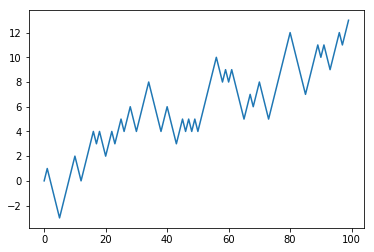

In [222]:
plt.plot(walk[:100])

In [224]:
# 用数组运算实现
nsteps = 1000
draws = np.random.randint(0,2,size=nsteps)
steps = np.where(draws>0,1,-1)
walk = steps.cumsum()

In [225]:
walk.min()

1

In [226]:
walk.max()

47

In [227]:
(np.abs(walk)>=10).argmax()

21

In [230]:
# 一次模拟多个随机漫步

nwalks = 5000
nsteps = 1000
draws = np.random.randint(0,2,size=(nwalks, nsteps)) # 0 or 1
steps = np.where(draws>0,1,-1)
walks = steps.cumsum(1)
walks

array([[ -1,  -2,  -1, ..., -18, -19, -18],
       [  1,   0,  -1, ...,  24,  23,  22],
       [ -1,   0,   1, ...,  14,  15,  16],
       ...,
       [ -1,   0,  -1, ...,  30,  29,  30],
       [  1,   0,  -1, ...,  18,  19,  20],
       [ -1,   0,   1, ...,  -6,  -7,  -8]], dtype=int32)

In [233]:
walks.max()

137

In [234]:
walks.min()

-137

In [235]:
hits30 = (np.abs(walks)>=30).any(1)

In [236]:
hits30

array([ True,  True,  True, ...,  True,  True, False])

In [237]:
hits30.sum()

3431

In [239]:
crossing_times = (np.abs(walks[hits30]) >= 30).argmax(1)
crossing_times.mean()

506.2532789274264

In [240]:
steps = np.random.normal(loc=0,scale=0.25,size=(nwalks, nsteps))